Niveles Audiomoths con Calibrador SV36 ENAC

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

from utils import *

file_audiomoth1 = 'C:\\Users\\GIS2\Documents\\tratamiento_niveles_audio\\Audiomoth_1\\Audiomoth_1_sploct.csv'
file_audiomoth2 = 'C:\\Users\\GIS2\Documents\\tratamiento_niveles_audio\\Audiomoth_2\\Audiomoth_2_sploct.csv'
file_audiomothDev = 'C:\\Users\\GIS2\Documents\\tratamiento_niveles_audio\\Audiomoth_Dev\\Audiomoth_Dev_sploct.csv'
file_audiomothDevPegatina = 'C:\\Users\\GIS2\Documents\\tratamiento_niveles_audio\\Audiomoth_Dev_ConPegatina\\Audiomoth_Dev_ConPegatina_sploct.csv'

df_audiomoth1 = pd.read_csv(file_audiomoth1)
df_audiomoth1.head()

def leq(levels):
    """
    Get continous equivalent level from a aeries of Spl values

    :param levels: SPl levels to obtain Equivalent sound pressure level
    :return: Leq level
    """
    e_sum = (np.sum(np.power(10, np.multiply(0.1, levels)))) / len(levels)
    eq_level = 10 * np.log10(e_sum)
    return eq_level

In [147]:
df_audiomoth1 = pd.read_csv(file_audiomoth1)
df_audiomoth1.head()

,Unnamed: 0,LA,LC,LZ,LAmax,LAmin,12.4,15.62,19.69,24.8,...,4000.0,5039.68,6349.6,8000.0,10079.37,12699.21,16000.0,20158.74,filename,date
0,0,41.80,50.24,51.22,58.63,-40.05,8.48,17.33,31.11,19.65,...,20.87,20.56,21.24,18.57,-inf,-inf,-inf,-inf,20230130_083834.wav.WAV,2023-01-30 08:38:34
1,1,40.18,49.71,50.78,51.93,-52.80,10.48,16.87,31.21,21.29,...,20.56,19.98,20.01,17.41,-inf,-inf,-inf,-inf,20230130_083834.wav.WAV,2023-01-30 08:38:35
2,2,42.40,49.59,50.50,62.63,-42.43,13.99,16.68,29.66,20.86,...,23.15,24.90,26.44,23.77,-inf,-inf,-inf,-inf,20230130_083834.wav.WAV,2023-01-30 08:38:36
3,3,42.46,47.20,48.04,56.27,-43.70,6.57,18.56,30.95,21.28,...,29.81,27.06,28.74,27.98,-inf,-inf,-inf,-inf,20230130_083834.wav.WAV,2023-01-30 08:38:37
4,4,49.23,53.06,53.20,62.68,-24.80,11.32,19.98,30.48,16.79,...,23.08,21.83,20.45,17.64,-inf,-inf,-inf,-inf,20230130_083834.wav.WAV,2023-01-30 08:38:38


In [148]:
spectrum_columns = ['31.25', '39.37', '49.61', '62.5', '78.75', '99.21',
       '125.0', '157.49', '198.43', '250.0', '314.98', '396.85', '500.0',
       '629.96', '793.7', '1000.0', '1259.92', '1587.4', '2000.0', '2519.84',
       '3174.8', '4000.0', '5039.68', '6349.6', '8000.0']

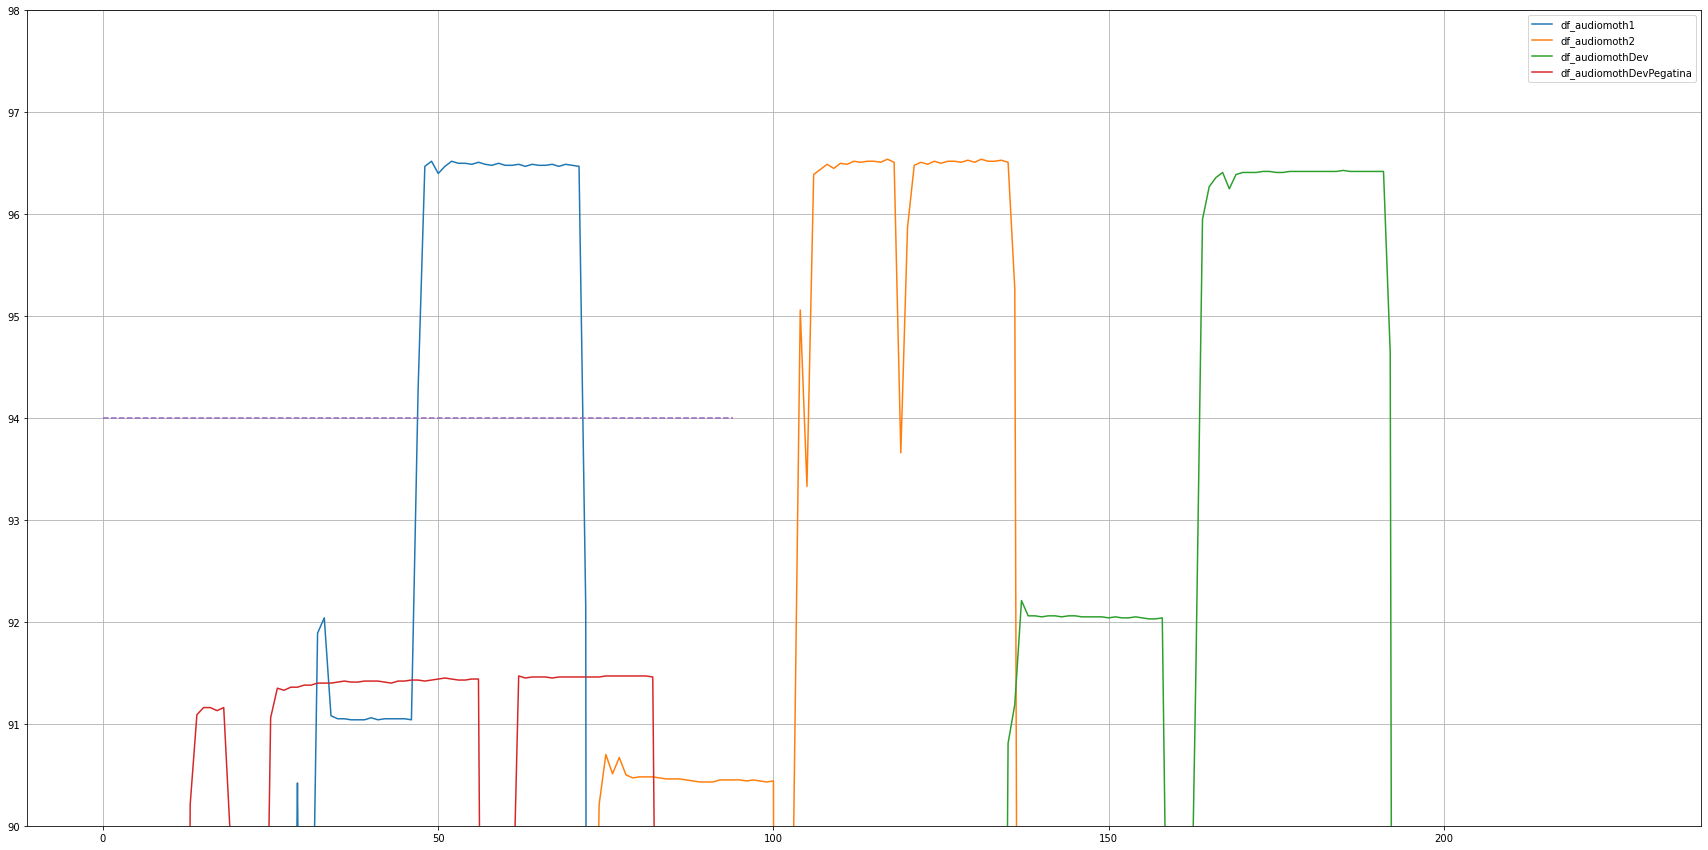

In [158]:
df_audiomoth1 = pd.read_csv(file_audiomoth1, parse_dates=['date'])
df_audiomoth2 = pd.read_csv(file_audiomoth2, parse_dates=['date'])
df_audiomothDev = pd.read_csv(file_audiomothDev, parse_dates=['date'])
df_audiomothDevPegatina = pd.read_csv(file_audiomothDevPegatina, parse_dates=['date'])

fig, ax = plt.subplots(figsize=(30,15))


for df in [df_audiomoth1,df_audiomoth2,df_audiomothDev,df_audiomothDevPegatina]:
    x = df.date
    y = df.LA.values
    
    ax.plot(y)
    ax.legend(["df_audiomoth1","df_audiomoth2","df_audiomothDev","df_audiomothDevPegatina"])
    plt.grid()

ax.plot(np.ones(len(x))*94,"--")
ax.plot(np.ones(len(x))*114, "--")

ylabels = [i for i in range(40,120,5)]
ax.set_ylim([90,98])
plt.grid()
#ax.set_yticklabels(ylabels)

(90.0, 98.0)

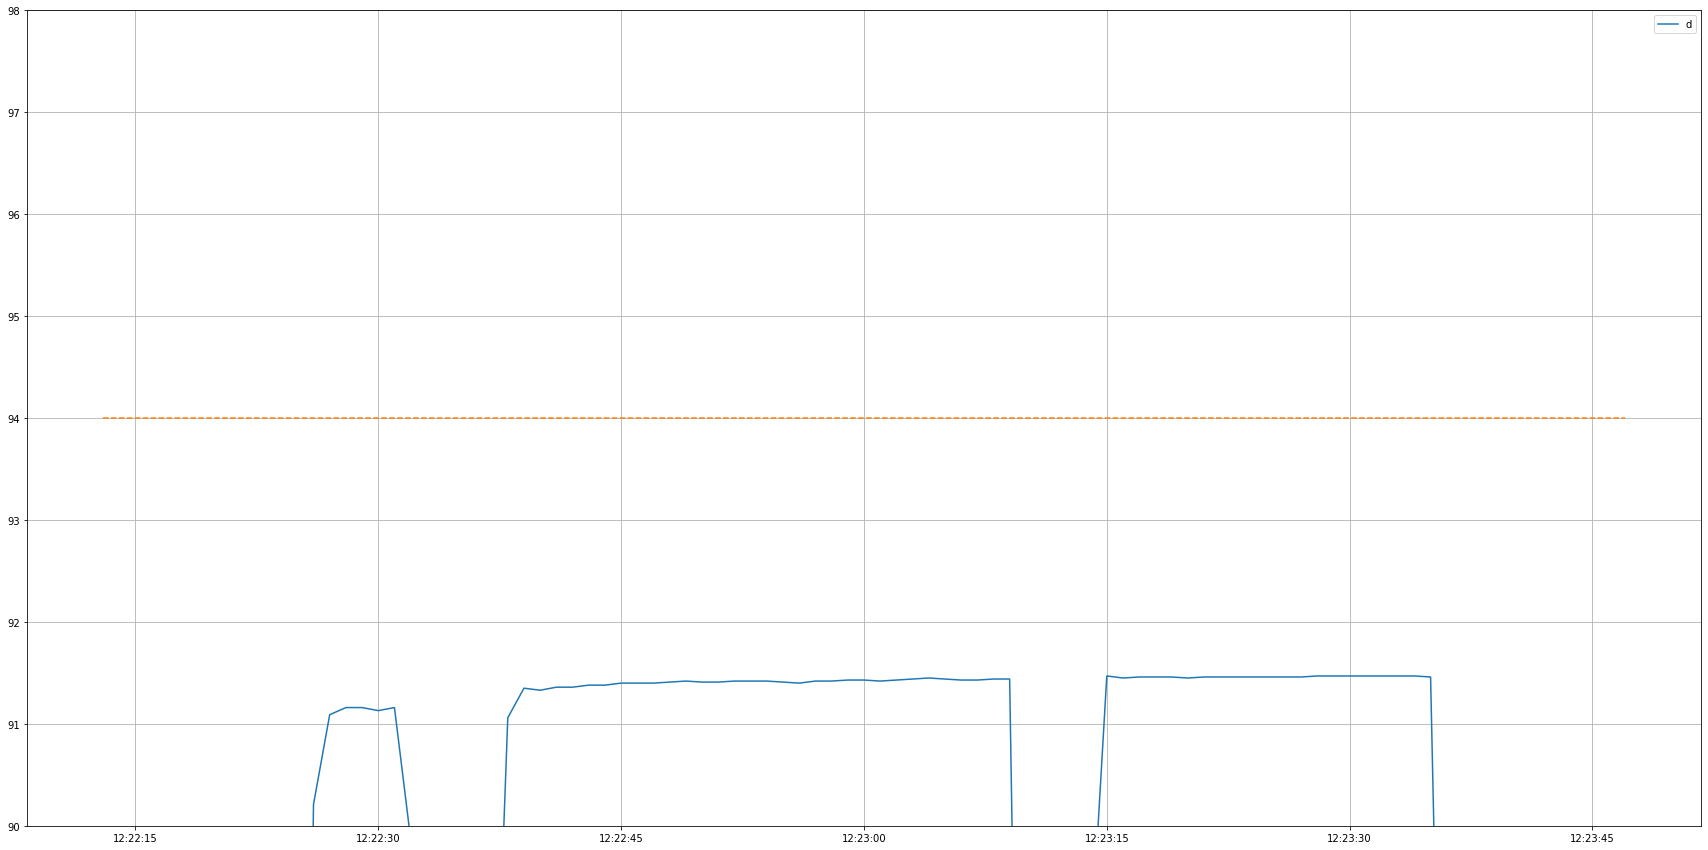

In [153]:


fig, ax = plt.subplots(figsize=(30,15))

x = df_audiomothDevPegatina.date
y = df_audiomothDevPegatina.LA

ax.plot(x, y)
ax.legend("df_audiomothDevPegatina")
plt.grid()

ax.plot(x,np.ones(len(x))*94,"--")

ylabels = [i for i in range(40,120,5)]
ax.set_ylim([90,98])

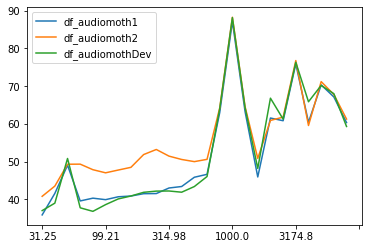

In [151]:
for df in [df_audiomoth1,df_audiomoth2,df_audiomothDev]:
    df[spectrum_columns].agg(leq).T.plot()
    plt.legend(["df_audiomoth1","df_audiomoth2","df_audiomothDev"])